In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import mlxtend
from mlxtend.frequent_patterns import apriori,association_rules

In [3]:
gros = pd.read_csv("Groceries_dataset.csv")
gros

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


In [5]:
gros.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [7]:
gros.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [9]:
gros.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [11]:
gros.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [13]:
gros.sum()

Member_number                                              116436177
Date               21-07-201505-01-201519-09-201512-12-201501-02-...
itemDescription    tropical fruitwhole milkpip fruitother vegetab...
dtype: object

<BarContainer object of 3898 artists>

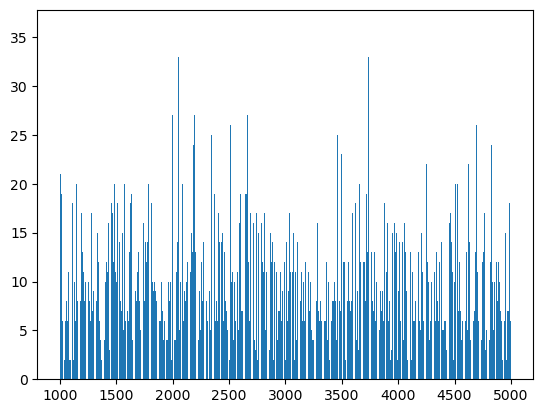

In [21]:
counts = gros['Member_number'].value_counts()
plt.bar(counts.index, counts.values)


In [23]:
df = pd.get_dummies(gros,dtype=int)
df.head()


,Member_number,Date_01-01-2014,Date_01-01-2015,Date_01-02-2014,Date_01-02-2015,Date_01-03-2014,Date_01-03-2015,Date_01-04-2014,Date_01-04-2015,Date_01-05-2014,...,itemDescription_turkey,itemDescription_vinegar,itemDescription_waffles,itemDescription_whipped/sour cream,itemDescription_whisky,itemDescription_white bread,itemDescription_white wine,itemDescription_whole milk,itemDescription_yogurt,itemDescription_zwieback
0,1808,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

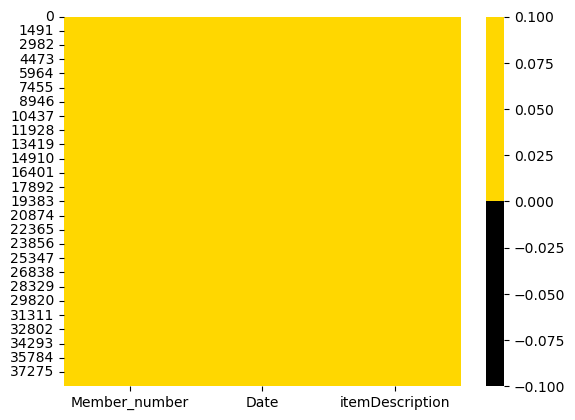

In [25]:
cols = gros.columns
colors = ['black', 'gold']
sns.heatmap(gros[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)



In [29]:
median_Member_number = gros["Member_number"].median()
mean_Member_number = gros["Member_number"].mean()
print("Median of Member_number: ", median_Member_number)
print("Mean of Member_number: ", mean_Member_number)

Median of Member_number:  3005.0
Mean of Member_number:  3003.64186766413


In [31]:
gros['Member_number'] = gros['Member_number'].fillna(mean_Member_number)
gros.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64